### 멀티레이블의 정의

- 

In [103]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split

In [110]:
tf.__version__

'2.10.0-dev20220714'

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [18]:
arr = np.load('celeb.npz')

In [19]:
X = arr['x']
y = arr['y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=527)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 218, 178, 3)
(200, 218, 178, 3)
(800, 2)
(200, 2)


In [115]:
### [미션1] (y값 원핫인코딩)
train_male_labels = tf.keras.utils.to_categorical(y_train[:, 0])
test_male_labels = tf.keras.utils.to_categorical(y_test[:, 1])

train_smile_labels = tf.keras.utils.to_categorical(y_train[:, 1])
test_smile_labels = tf.keras.utils.to_categorical(y_test[:, 1])

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]], dtype=float32),
 array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]], dtype=float32))

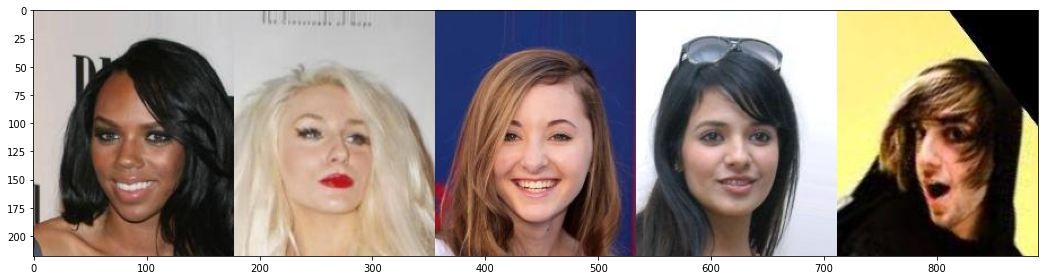

In [116]:
# [미션2] y값과 이미지 확인
plt.figure(figsize=(18, 10))
plt.imshow(np.hstack(X_train[:5]))
train_male_labels[:5], train_smile_labels[:5]

In [96]:
train_male_labels.shape

(800, 2)

In [98]:
# 미션[3] train의 male과 smile의 원핫인코딩을 한개의 값으로 만들어서 train_label2에 할당
# test의 male과 smile의 원핫인코딩을 한개의 값으로 만들어서 test_label2에 할당
# 즉 여자[1, 0]과 웃음[0, 1]이 합쳐져서 [1, 0, 0, 1]로 만들어져야 함/
train_label2 = np.concatenate([train_male_labels, train_smile_labels], axis=1)
test_label2 = np.concatenate([test_male_labels, test_smile_labels], axis=1)

In [101]:
train_label2[:5], test_label2[:5]

(array([[1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 0., 1.],
        [1., 0., 0., 1.],
        [0., 1., 1., 0.]], dtype=float32),
 array([[0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [1., 0., 1., 0.]], dtype=float32))

In [106]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Dense, Flatten


def simple_model():
    inputs = Input((218, 178, 3))

    x = Conv2D(32, 3, activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)

    outputs = Dense(2, activation='softmax')(x)
    model = Model(inputs, outputs)

    return model

In [108]:
# simple_model() 모델을 2번 할당 받고 서머리를 출력하는 코드를 작성하세요.
gender_model = simple_model()
gender_model.compile(loss="categorical_crossentropy",
                     optimizer='adam',
                     metrics=['accuracy'])
gender_model.fit(X_train,
                 train_male_labels,
                 validation_data=(X_test, test_male_labels),
                 epochs=10)

Epoch 1/10
25/25 [==============================] - 9s 335ms/step - loss: 54.2825 - accuracy: 0.5612 - val_loss: 1.0187 - val_accuracy: 0.4300
Epoch 2/10
25/25 [==============================] - 8s 331ms/step - loss: 0.6593 - accuracy: 0.7175 - val_loss: 1.1060 - val_accuracy: 0.4850
Epoch 3/10
25/25 [==============================] - 8s 336ms/step - loss: 0.4917 - accuracy: 0.8112 - val_loss: 1.2858 - val_accuracy: 0.5000
Epoch 4/10
25/25 [==============================] - 9s 380ms/step - loss: 0.3344 - accuracy: 0.8525 - val_loss: 1.9288 - val_accuracy: 0.5000
Epoch 5/10
25/25 [==============================] - 11s 428ms/step - loss: 0.2209 - accuracy: 0.9262 - val_loss: 2.6714 - val_accuracy: 0.4300
Epoch 6/10
25/25 [==============================] - 11s 423ms/step - loss: 0.1358 - accuracy: 0.9475 - val_loss: 2.6279 - val_accuracy: 0.4750
Epoch 7/10
25/25 [==============================] - 11s 423ms/step - loss: 0.0512 - accuracy: 0.9862 - val_loss: 4.2735 - val_accuracy: 0.4900
Ep

In [109]:
# simple_model() 모델을 2번 할당 받고 서머리를 출력하는 코드를 작성하세요.
smile_model = simple_model()
smile_model.compile(loss="categorical_crossentropy",
                    optimizer='adam',
                    metrics=['accuracy'])
smile_model.fit(X_train,
                train_smile_labels,
                validation_data=(X_test, test_smile_labels),
                epochs=10)

Epoch 1/10
25/25 [==============================] - 11s 416ms/step - loss: 33.2318 - accuracy: 0.4975 - val_loss: 0.6747 - val_accuracy: 0.6050
Epoch 2/10
25/25 [==============================] - 10s 416ms/step - loss: 0.6789 - accuracy: 0.6000 - val_loss: 0.6438 - val_accuracy: 0.6700
Epoch 3/10
25/25 [==============================] - 10s 399ms/step - loss: 0.6241 - accuracy: 0.6837 - val_loss: 0.6040 - val_accuracy: 0.7250
Epoch 4/10
25/25 [==============================] - 10s 412ms/step - loss: 0.6146 - accuracy: 0.6687 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 5/10
25/25 [==============================] - 10s 416ms/step - loss: 0.6836 - accuracy: 0.5188 - val_loss: 0.6918 - val_accuracy: 0.4950
Epoch 6/10
25/25 [==============================] - 11s 443ms/step - loss: 0.6923 - accuracy: 0.5013 - val_loss: 0.6895 - val_accuracy: 0.5050
Epoch 7/10
25/25 [==============================] - 10s 420ms/step - loss: 0.6781 - accuracy: 0.5750 - val_loss: 0.6510 - val_accuracy: 0.695

### 멀티아웃풋 모델링

In [121]:
from keras.layers import Concatenate


def multi_model1():
    inputs = Input((218, 178, 3))

    x = Conv2D(32, 3, activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)

    outputs_gender = Dense(2, activation='softmax')(x)
    outputs_smile = Dense(2, activation='softmax')(x)

    outputs = Concatenate(axis=1)([outputs_gender, outputs_smile])

    model = Model(inputs, outputs)

    return model

In [122]:
# y값을 성별과 웃음이 들어간 4bit짜리의 원핫인코딩 자료로 작업하려함.
model = multi_model1()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train,
                    train_label2,
                    validation_data=(X_test, test_label2),
                    epochs=2,
                    verbose=1)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 218, 178, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 216, 176, 32  896         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_30 (MaxPooling2D  (None, 108, 88, 32)  0          ['conv2d_30[0][0]']              
 )                                                                                         

In [127]:
from keras.layers import Concatenate


def multi_model2():
    inputs = Input((218, 178, 3))

    x = Conv2D(32, 3, activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)

    outputs_gender = Dense(2, activation='softmax')(x)
    outputs_smile = Dense(2, activation='softmax')(x)

    # 따로 받아야됨
    model = Model(inputs, [outputs_gender, outputs_smile])

    return model

In [128]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 218, 178, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 216, 176, 32  896         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_36 (MaxPooling2D  (None, 108, 88, 32)  0          ['conv2d_36[0][0]']              
 )                                                                                         

In [126]:
model = multi_model2()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, [train_male_labels, train_smile_labels],
                    validation_data=(X_test,
                                     [test_male_labels, test_smile_labels]),
                    epochs=2,
                    verbose=1)

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 218, 178, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 216, 176, 32  896         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_36 (MaxPooling2D  (None, 108, 88, 32)  0          ['conv2d_36[0][0]']              
 )                                                                                         

<AxesSubplot:ylabel='Count'>

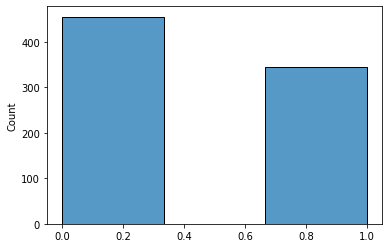

In [54]:
sns.histplot(data=train_male_labels, bins=3)

<AxesSubplot:ylabel='Count'>

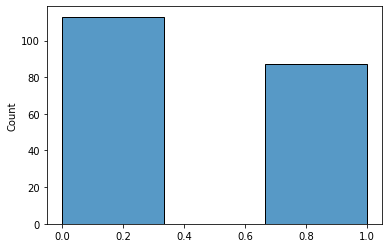

In [55]:
sns.histplot(data=test_male_labels, bins=3)

<AxesSubplot:ylabel='Count'>

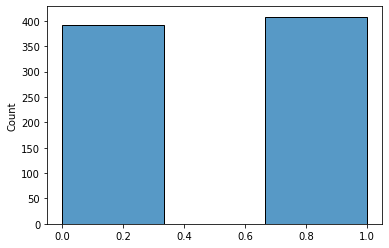

In [57]:
sns.histplot(data=train_smile_labels, bins=3)

<AxesSubplot:ylabel='Count'>

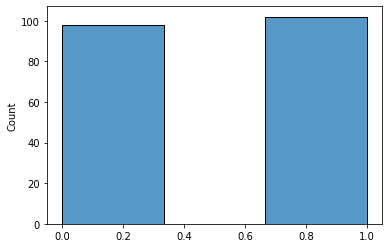

In [58]:
sns.histplot(data=test_smile_labels, bins=3)

In [60]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

uint8
uint8
int32
int32


In [61]:
def get_range(*var):
    for x in var:
        print(x.min(), '~', x.max())


get_range(X_train, X_test, y_train, y_test)

0 ~ 255
0 ~ 255
0 ~ 1
0 ~ 1
